[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/Stochastic_Gradient_Descent_.ipynb)

-- Epoch 1
Norm: 9.23, NNZs: 2, Bias: 4.247853, T: 50, Avg. loss: 1.118601
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.70, NNZs: 2, Bias: 3.470385, T: 100, Avg. loss: 0.074120
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.61, NNZs: 2, Bias: 4.213202, T: 150, Avg. loss: 0.050159
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.07, NNZs: 2, Bias: 4.206838, T: 200, Avg. loss: 0.060801
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 3.34, NNZs: 2, Bias: 4.206838, T: 250, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.84, NNZs: 2, Bias: 4.206838, T: 300, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 3.27, NNZs: 2, Bias: 4.211018, T: 350, Avg. loss: 0.040565
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 3.20, NNZs: 2, Bias: 4.234051, T: 400, Avg. loss: 0.029310
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 2.68, NNZs: 2, Bias: 4.463081, T: 450, Avg. loss: 0.019409
Total training time: 0.01 seconds.
--

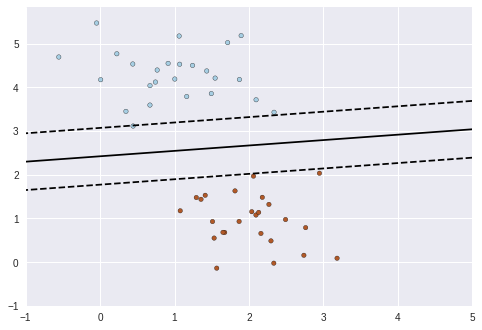

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

X,Y=make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

clf=SGDClassifier(loss="hinge",alpha=0.01,max_iter=200,fit_intercept=True,verbose=3)
clf.fit(X,Y)
xx=np.linspace(-1,5,10)
yy=np.linspace(-1,5,10)
X1,X2=np.meshgrid(xx,yy)
Z=np.empty(X1.shape)
for (i,j),val in np.ndenumerate(X1):
  x1=val
  x2=X2[i,j]
  p=clf.decision_function([[x1,x2]])
  Z[i,j]=p[0]
levels=[-1.0,0.0,1.0]
linestyles=['dashed','solid','dashed']
colors='k'
plt.contour(X1,X2,Z,levels,colors=colors,linestyles=linestyles)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired,edgecolor='black',s=20)
plt.axis('tight')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


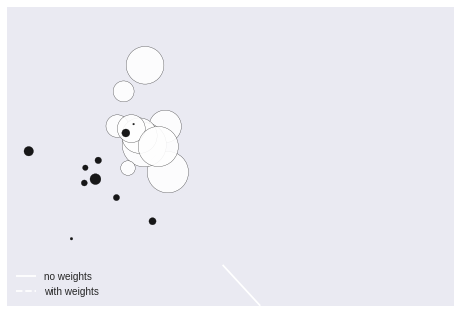

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

np.random.seed(0)
X=np.r_[np.random.randn(10,2)+[1,1],np.random.randn(10,2)]
y=[1]*10+[-1]*10
sample_weight=100*np.abs(np.random.randn(20))
sample_weight[:10]*=10
xx,yy=np.meshgrid(np.linspace(14,5,500),np.linspace(-4,5,500))
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=sample_weight,alpha=0.9,cmap=plt.cm.bone,edgecolor='black')
clf=linear_model.SGDClassifier(alpha=0.01,max_iter=100)
clf.fit(X,y)
Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
no_weights=plt.contour(xx,yy,Z,levels=[0],linestyles=['solid'])
clf=linear_model.SGDClassifier(alpha=0.01,max_iter=100)
clf.fit(X,y,sample_weight=sample_weight)
Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
sample_weights=plt.contour(xx,yy,Z,levels=[0],linestyles=['dashed'])
plt.legend([no_weights.collections[0],sample_weights.collections[0]],["no weights","with weights"],loc=3)
plt.xticks(())
plt.yticks(())
plt.show()
                        

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


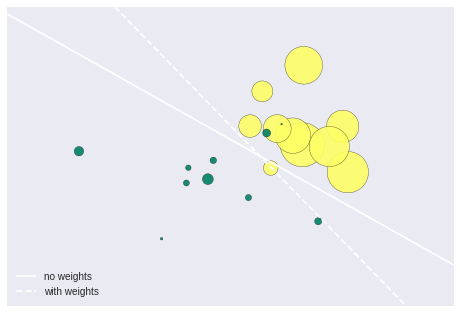

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9,
            cmap=plt.cm.summer, edgecolor='black')

# fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'],color='gray')

# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['dashed'],color='black')

plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")

plt.xticks(())
plt.yticks(())
plt.show()

training SGD


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


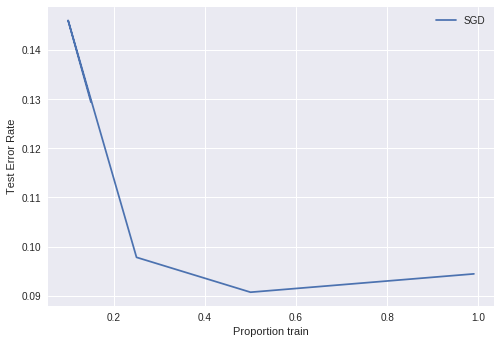

training ASGD


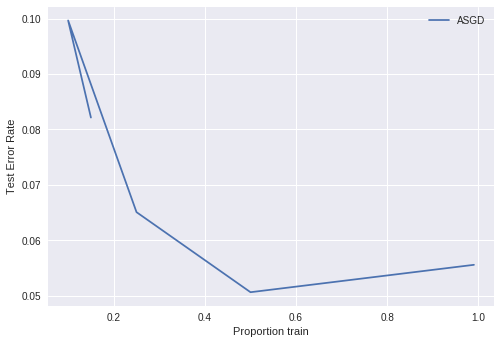

training Perceptron


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


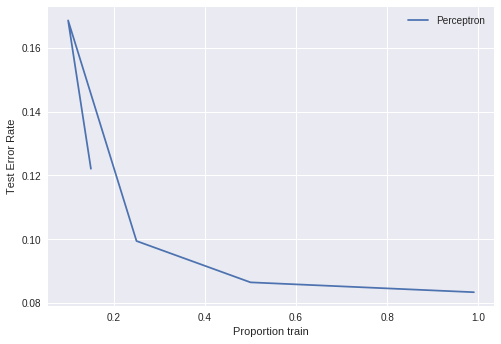

training Passive-Aggressive I


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


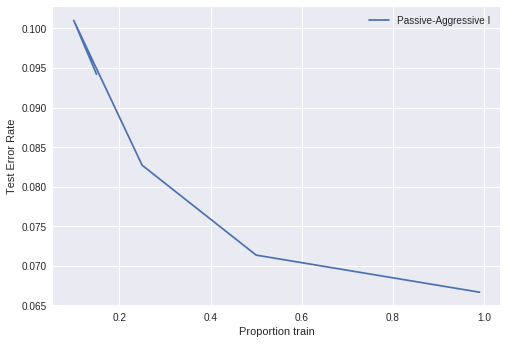

training Passive-AggerssiveII


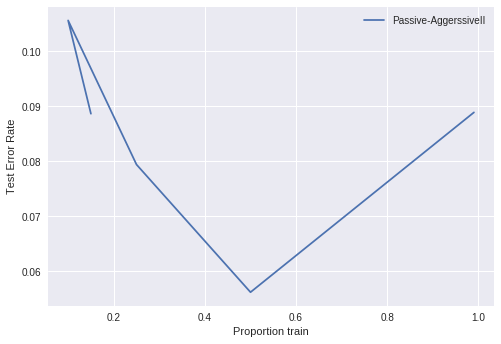

training SAG


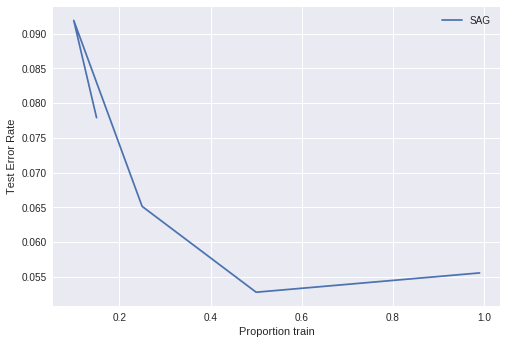

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression

heldout=[0.85,0.90,0.75,0.50,0.01]
rounds=20
digits=datasets.load_digits()
X,y=digits.data, digits.target
classifiers=[("SGD",SGDClassifier()),("ASGD",SGDClassifier(average=True)),("Perceptron",Perceptron()),("Passive-Aggressive I",PassiveAggressiveClassifier(loss='hinge',C=1.0)),
             ("Passive-AggerssiveII",PassiveAggressiveClassifier(loss='squared_hinge',C=1.0)),("SAG",LogisticRegression(solver='sag',tol=1e-1,C=1.e4/X.shape[0]))]
xx=1.-np.array(heldout)
for name,clf in classifiers:
  print("training %s" %name)
  rng=np.random.RandomState(42)
  yy=[]
  for i in heldout:
    yy_=[]
    for r in range(rounds):
      X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=rng)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      yy_.append(1-np.mean(y_pred==y_test))
    yy.append(np.mean(yy_))
  plt.plot(xx,yy,label=name)
  plt.legend(loc='best')
  plt.xlabel("Proportion train")
  plt.ylabel("Test Error Rate")
  plt.show()
